In [1]:
import pandas as pd
import numpy as np
import sys
import os
sys.path.append(os.path.abspath('../modules'))
from statistical_methods import StatisticalMethods
from best_models import models_to_cv
import matplotlib.colors as mcolors
import seaborn as sns
import math
import matplotlib.pyplot as plt
from results_visualization import plot_metric_boxplots, plot_time_vs_performance_scatter

In [2]:
best_models, ensembles = models_to_cv()

metrics = {}
for model in best_models.keys():
    metrics[model] = pd.read_csv(f'../metrics_correct/metrics_adasyn_{model}_cv.csv')
for model in ensembles.keys():
    metrics[model] = pd.read_csv(f'../metrics_correct/metrics_adasyn_{model}_cv.csv')

In [3]:
list_of_model_results = [metrics[model] for model in metrics.keys()]
list_of_model_names = list(metrics.keys())
list_of_metrics_names = ['train_accuracy', 'test_accuracy', 'ACSA', 'recall', 'precision', 'f1_score', 'training_time', 'inference_time', 'loacc', 'auc']

comp = StatisticalMethods(list_of_model_results, list_of_model_names, list_of_metrics_names)

friedman_results, metrics_with_difference = comp.friedman_test()

nemenyi_results = comp.nemenyi_test(metrics_with_difference)

In [4]:
comp.get_estimate_and_ci()

,model,metric,mean,std,ci
0,KNN,train_accuracy,0.877830,0.001451,"0.8769, 0.8787"
1,KNN,test_accuracy,0.803750,0.008439,"0.7985, 0.8090"
2,KNN,ACSA,0.803683,0.010892,"0.7969, 0.8104"
3,KNN,recall,0.803903,0.007078,"0.7995, 0.8083"
4,KNN,precision,0.885749,0.010694,"0.8791, 0.8924"
...,...,...,...,...,...
95,ANNs,f1_score,0.888242,0.007935,"0.8833, 0.8932"
96,ANNs,training_time,79.128709,10.879928,"72.3853, 85.8722"
97,ANNs,inference_time,0.027515,0.009418,"0.0217, 0.0334"
98,ANNs,loacc,0.453167,0.042709,"0.4267, 0.4796"


In [5]:
estimates_and_cis = comp.get_formatted_estimate_and_ci()
estimates_and_cis

,Modelo,Métrica,Média,Desvio,IC
0,KNN,Acurácia de treino,87.78,0.15,"[87.69 , 87.87]"
1,KNN,Acurácia de teste,80.37,0.84,"[79.85 , 80.90]"
2,KNN,ACSA,80.37,1.09,"[79.69 , 81.04]"
3,KNN,Recall,80.39,0.71,"[79.95 , 80.83]"
4,KNN,Precisão,88.57,1.07,"[87.91 , 89.24]"
...,...,...,...,...,...
95,ANNs,F1-score,88.82,0.79,"[88.33 , 89.32]"
96,ANNs,Tempo de treinamento,79.10,10.90,"[7238.53 , 8587.22]"
97,ANNs,Tempo de inferência,2.75,0.94,"[2.17 , 3.34]"
98,ANNs,LOACC,45.32,4.27,"[42.67 , 47.96]"


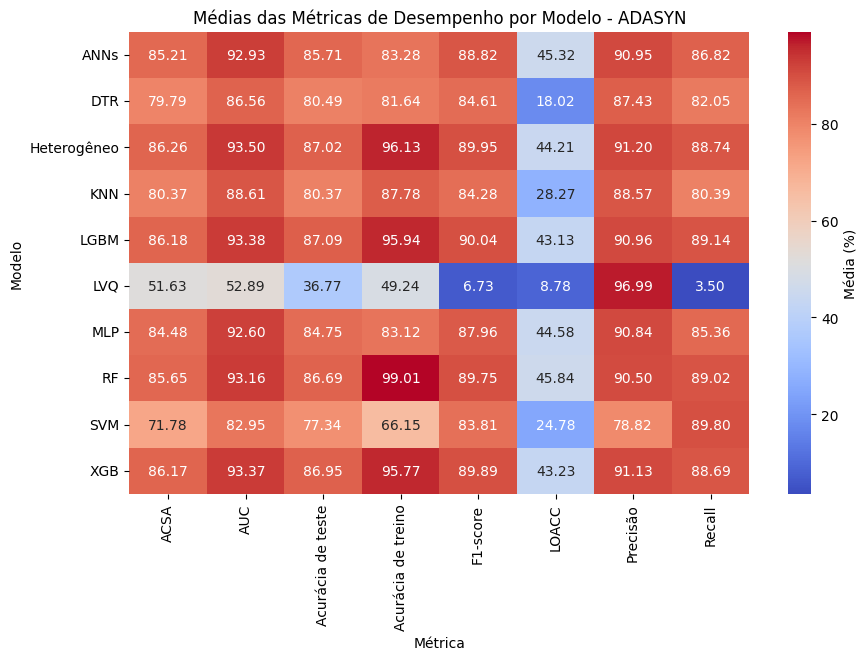

In [6]:
filtered_data = estimates_and_cis[estimates_and_cis['Métrica'].isin(['ACSA', 'Recall','Precisão', 'F1-score', 'Acurácia de treino', 'Acurácia de teste', 'LOACC', 'AUC'])]
heatmap_data = filtered_data.pivot(index="Modelo", columns="Métrica", values="Média")

plt.figure(figsize=(10, 6))
sns.heatmap(heatmap_data, annot=True, fmt=".2f", cmap="coolwarm", cbar_kws={'label': 'Média (%)'})
plt.title("Médias das Métricas de Desempenho por Modelo - ADASYN")
plt.xlabel("Métrica")
plt.ylabel("Modelo")
plt.show()

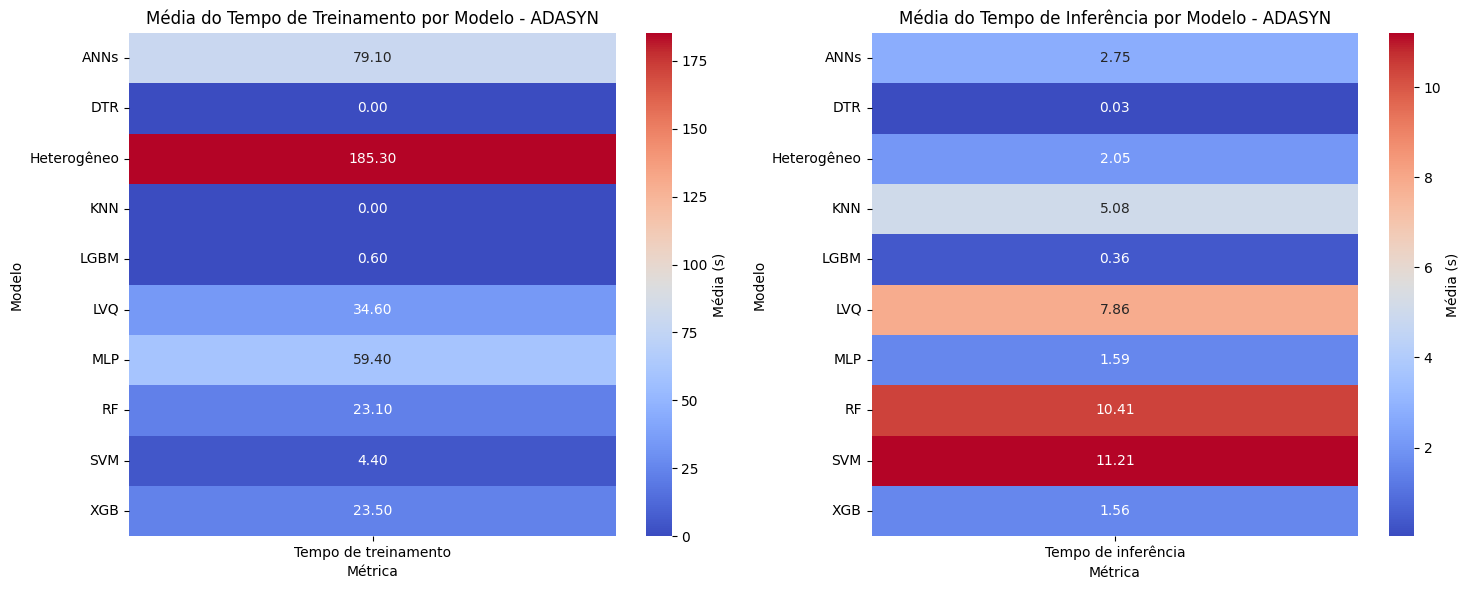

In [7]:
filtered_training_time = estimates_and_cis[estimates_and_cis['Métrica'] == 'Tempo de treinamento']
heatmap_training_time = filtered_training_time.pivot(index="Modelo", columns="Métrica", values="Média")

filtered_inference_time = estimates_and_cis[estimates_and_cis['Métrica'] == 'Tempo de inferência']
heatmap_inference_time = filtered_inference_time.pivot(index="Modelo", columns="Métrica", values="Média")

fig, axes = plt.subplots(1, 2, figsize=(15, 6))

sns.heatmap(heatmap_training_time, annot=True, fmt=".2f", cmap="coolwarm", cbar_kws={'label': 'Média (s)'}, ax=axes[0])
axes[0].set_title("Média do Tempo de Treinamento por Modelo - ADASYN")
axes[0].set_xlabel("Métrica")
axes[0].set_ylabel("Modelo")

sns.heatmap(heatmap_inference_time, annot=True, fmt=".2f", cmap="coolwarm", cbar_kws={'label': 'Média (s)'}, ax=axes[1])
axes[1].set_title("Média do Tempo de Inferência por Modelo - ADASYN")
axes[1].set_xlabel("Métrica")
axes[1].set_ylabel("Modelo")

plt.tight_layout()
plt.show()

In [8]:
friedman_results

,metric,statistic,p-value,are_different
0,train_accuracy,88.429091,3.362369e-15,True
1,test_accuracy,83.012797,4.064633e-14,True
2,ACSA,79.919345,1.676861e-13,True
3,recall,68.630488,2.824014e-11,True
4,precision,74.265009,2.206922e-12,True
5,f1_score,82.244391,5.782252e-14,True
6,training_time,87.381818,5.449717e-15,True
7,inference_time,83.504253,3.243789e-14,True
8,loacc,71.250456,8.653669e-12,True
9,auc,81.992727,6.489393e-14,True


In [9]:
nemenyi_results

,metric,classifier_pair,p-value,are_different
0,train_accuracy,KNN vs LVQ,0.008432,True
1,train_accuracy,KNN vs DTR,0.603239,False
2,train_accuracy,KNN vs SVM,0.091175,False
3,train_accuracy,KNN vs RF,0.091175,False
4,train_accuracy,KNN vs XGB,0.998421,False
...,...,...,...,...
445,auc,LGBM vs Heterogêneo,0.984073,False
446,auc,LGBM vs ANNs,0.999261,False
447,auc,MLP vs Heterogêneo,0.060077,False
448,auc,MLP vs ANNs,0.963100,False


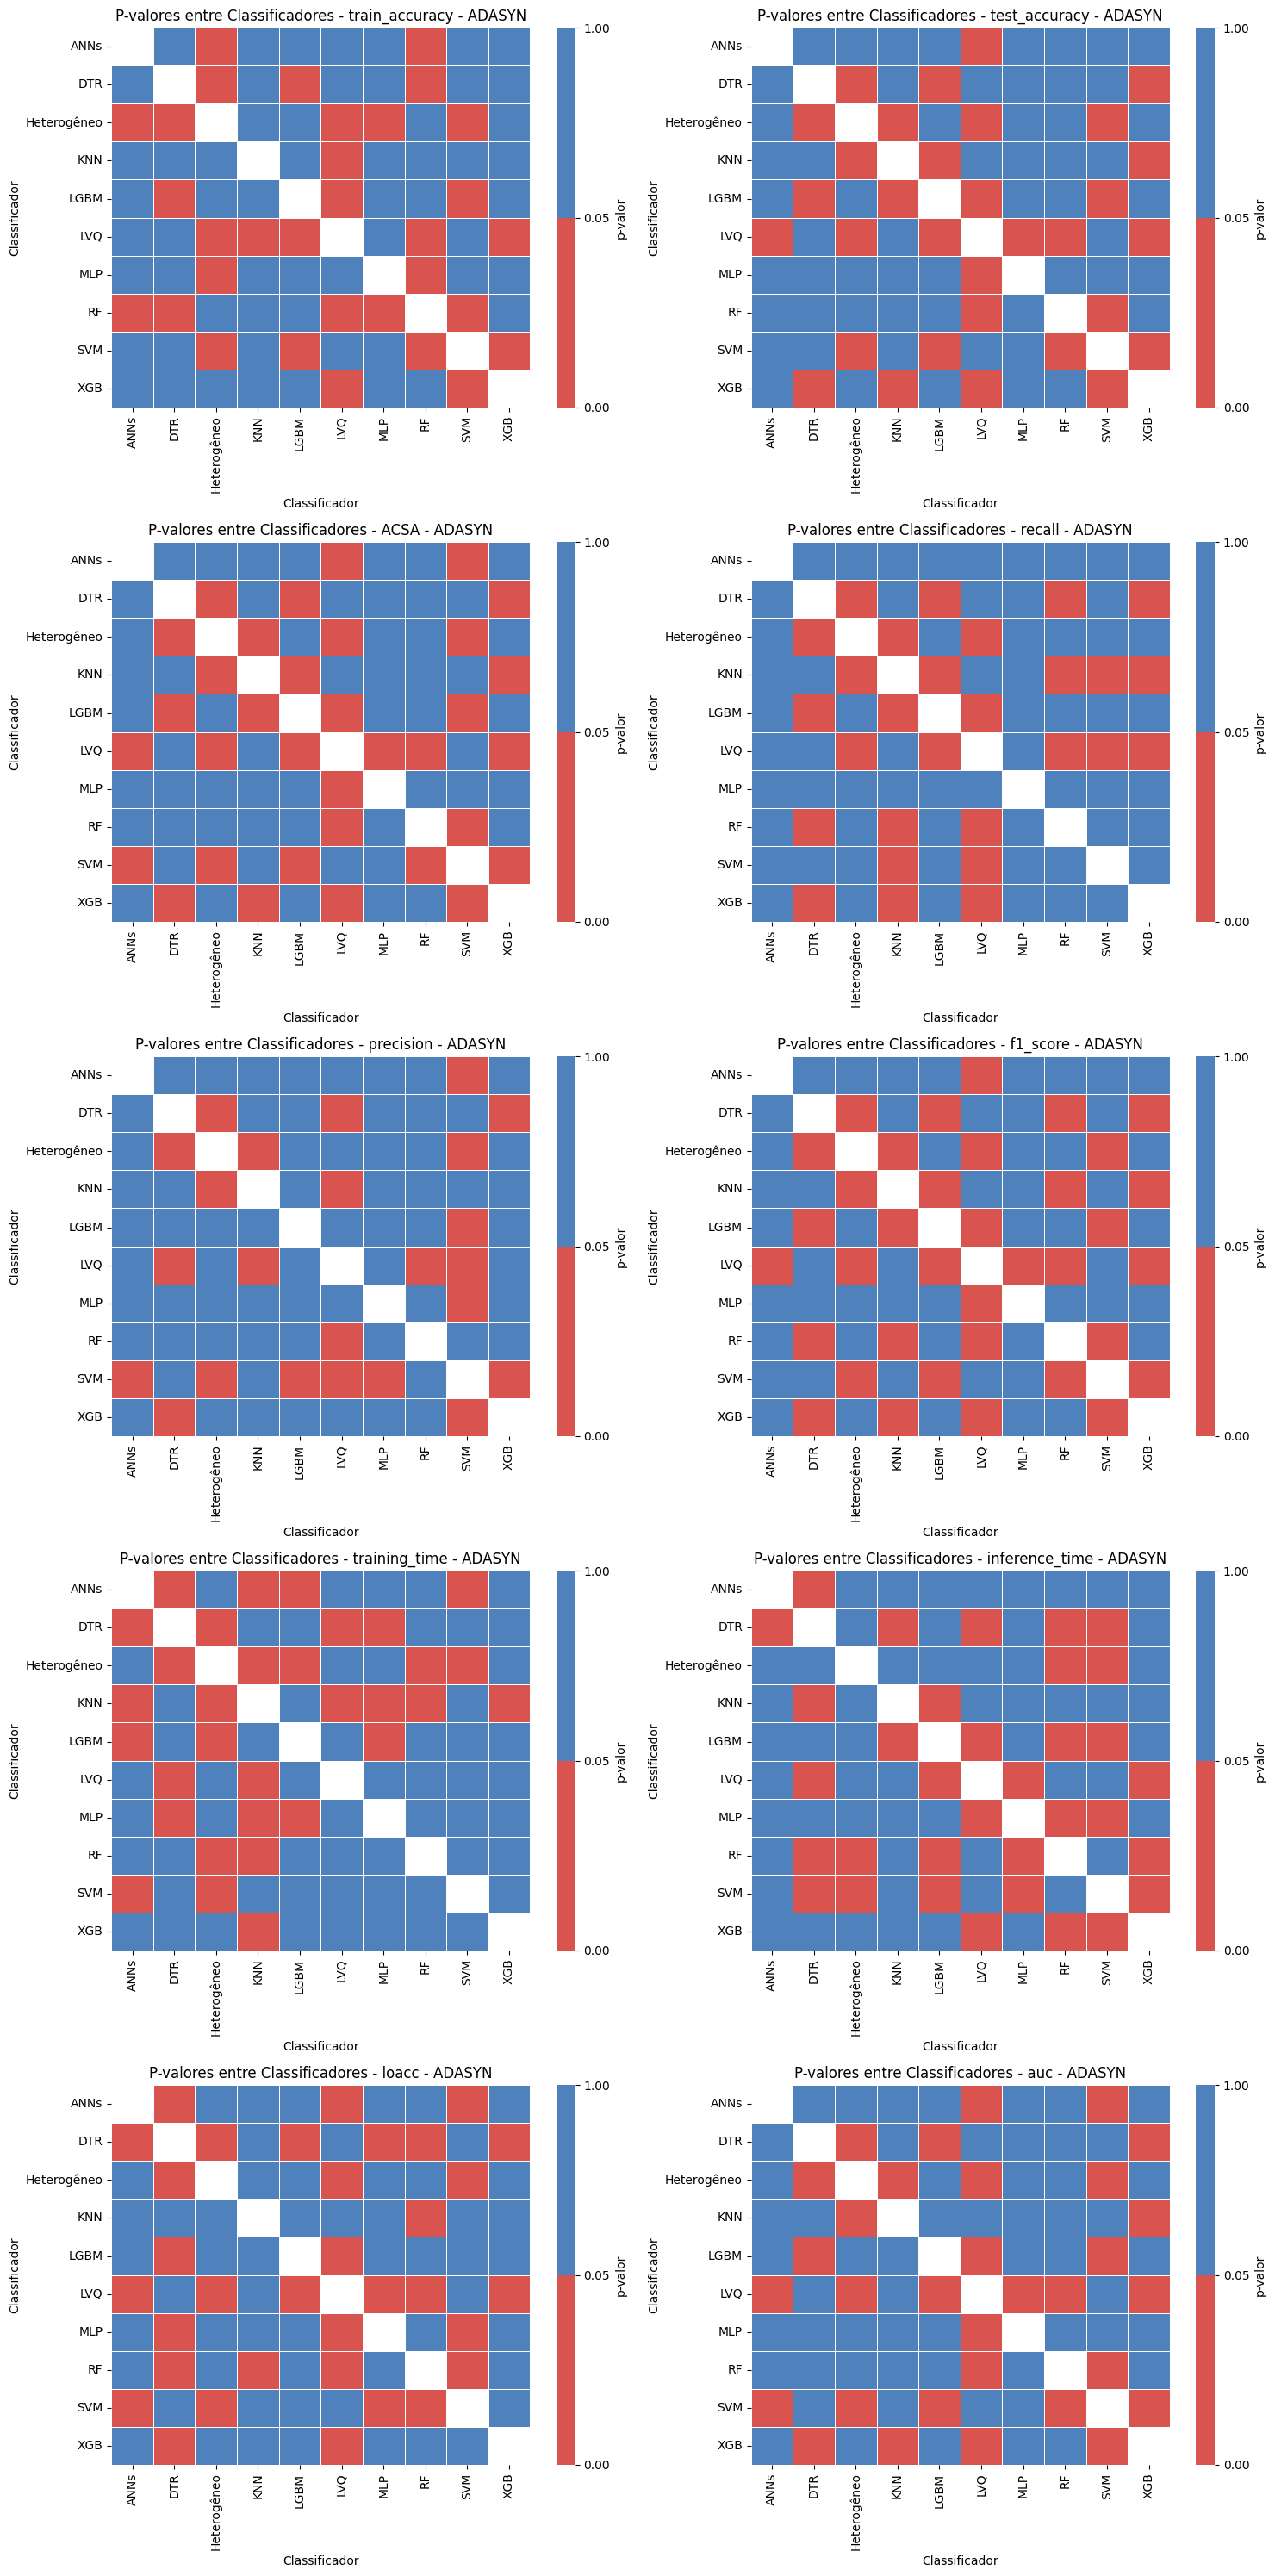

In [10]:

nemenyi_results[['classifier1', 'classifier2']] = nemenyi_results['classifier_pair'].str.split(' vs ', expand=True)

num_metrics = len(nemenyi_results['metric'].unique())
num_columns = 2
num_rows = math.ceil(num_metrics / num_columns)

fig, axes = plt.subplots(num_rows, num_columns, figsize=(15, 6 * num_rows))
axes = axes.flatten()

for i, metric in enumerate(nemenyi_results['metric'].unique()):
    metric_data = nemenyi_results[nemenyi_results['metric'] == metric]
    pivot_table = metric_data.pivot_table(index="classifier1", columns="classifier2", values="p-value").combine_first(metric_data.pivot_table(index="classifier2", columns="classifier1", values="p-value"))
    sns.heatmap(pivot_table, annot=False, fmt=".4f", cmap=mcolors.ListedColormap(["#D9534F", "#4F81BD"]), norm=mcolors.BoundaryNorm([0, 0.05, 1], 2), linewidths=0.5, cbar_kws={'label': 'p-valor'}, annot_kws={'color': 'white', 'fontsize': 10}, ax=axes[i])
    axes[i].set_title(f"P-valores entre Classificadores - {metric} - ADASYN")
    axes[i].set_xlabel("Classificador")
    axes[i].set_ylabel("Classificador")

for j in range(i + 1, len(axes)):
    axes[j].axis('off')

plt.tight_layout()
plt.show()


In [11]:
nemenyi_results.loc[nemenyi_results['are_different'] == True]

,metric,classifier_pair,p-value,are_different,classifier1,classifier2
0,train_accuracy,KNN vs LVQ,8.431749e-03,True,KNN,LVQ
11,train_accuracy,LVQ vs RF,1.345634e-09,True,LVQ,RF
12,train_accuracy,LVQ vs XGB,2.838903e-04,True,LVQ,XGB
13,train_accuracy,LVQ vs LGBM,1.533054e-05,True,LVQ,LGBM
15,train_accuracy,LVQ vs Heterogêneo,1.548799e-07,True,LVQ,Heterogêneo
...,...,...,...,...,...,...
429,auc,SVM vs RF,1.436997e-02,True,SVM,RF
430,auc,SVM vs XGB,2.011091e-04,True,SVM,XGB
431,auc,SVM vs LGBM,5.557938e-04,True,SVM,LGBM
433,auc,SVM vs Heterogêneo,2.061168e-06,True,SVM,Heterogêneo


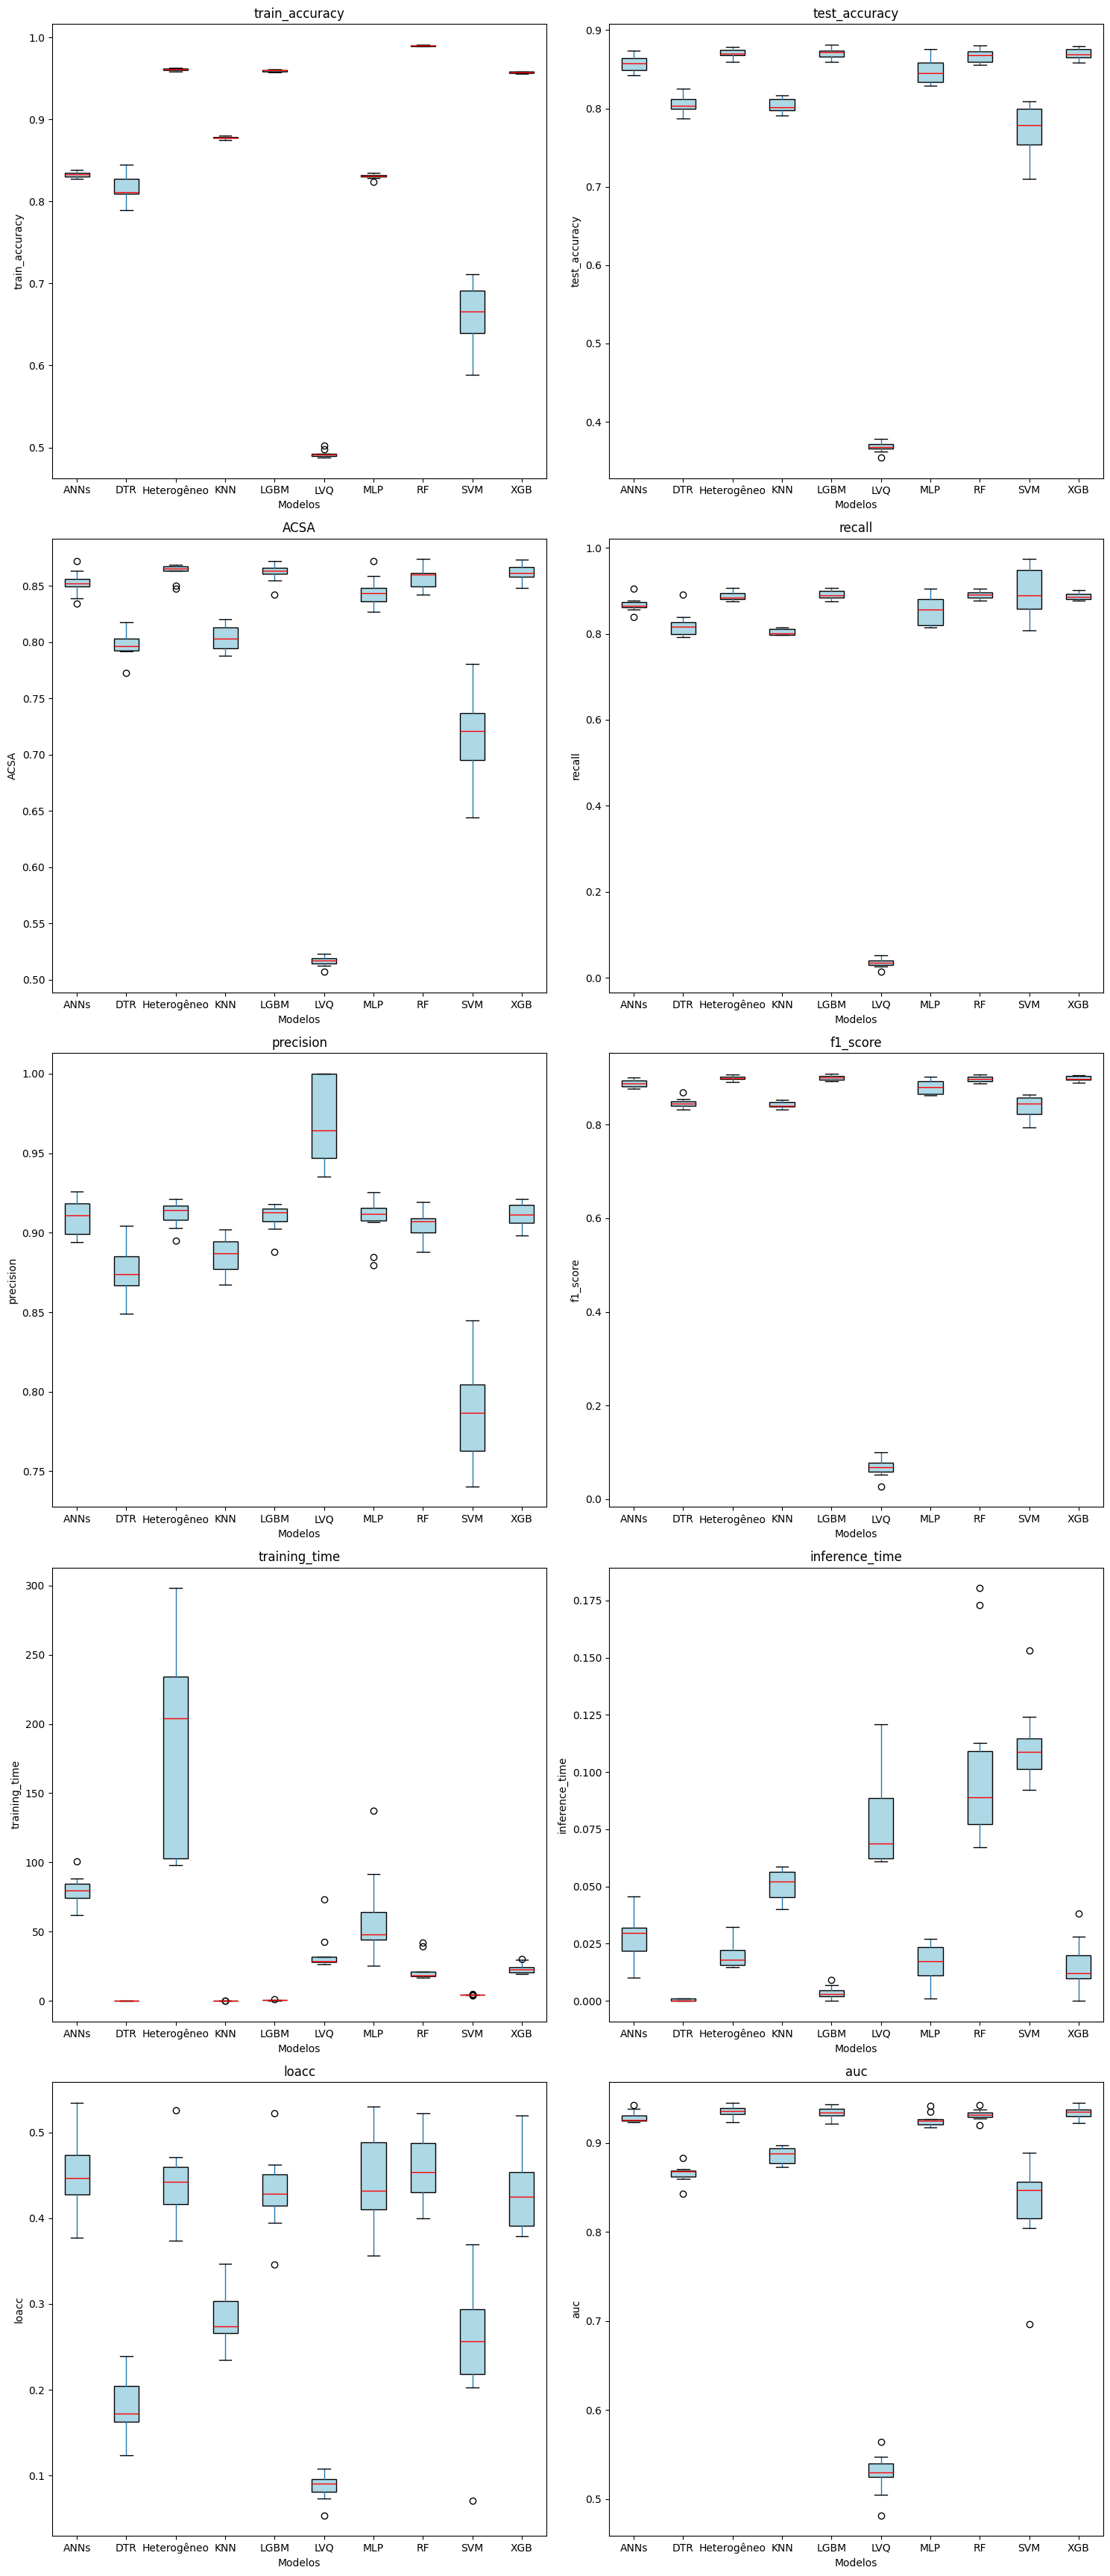

In [14]:
plot_metric_boxplots(
    list_of_model_results=list_of_model_results,
    list_of_model_names=list_of_model_names,
    list_of_metrics_names = list_of_metrics_names
)

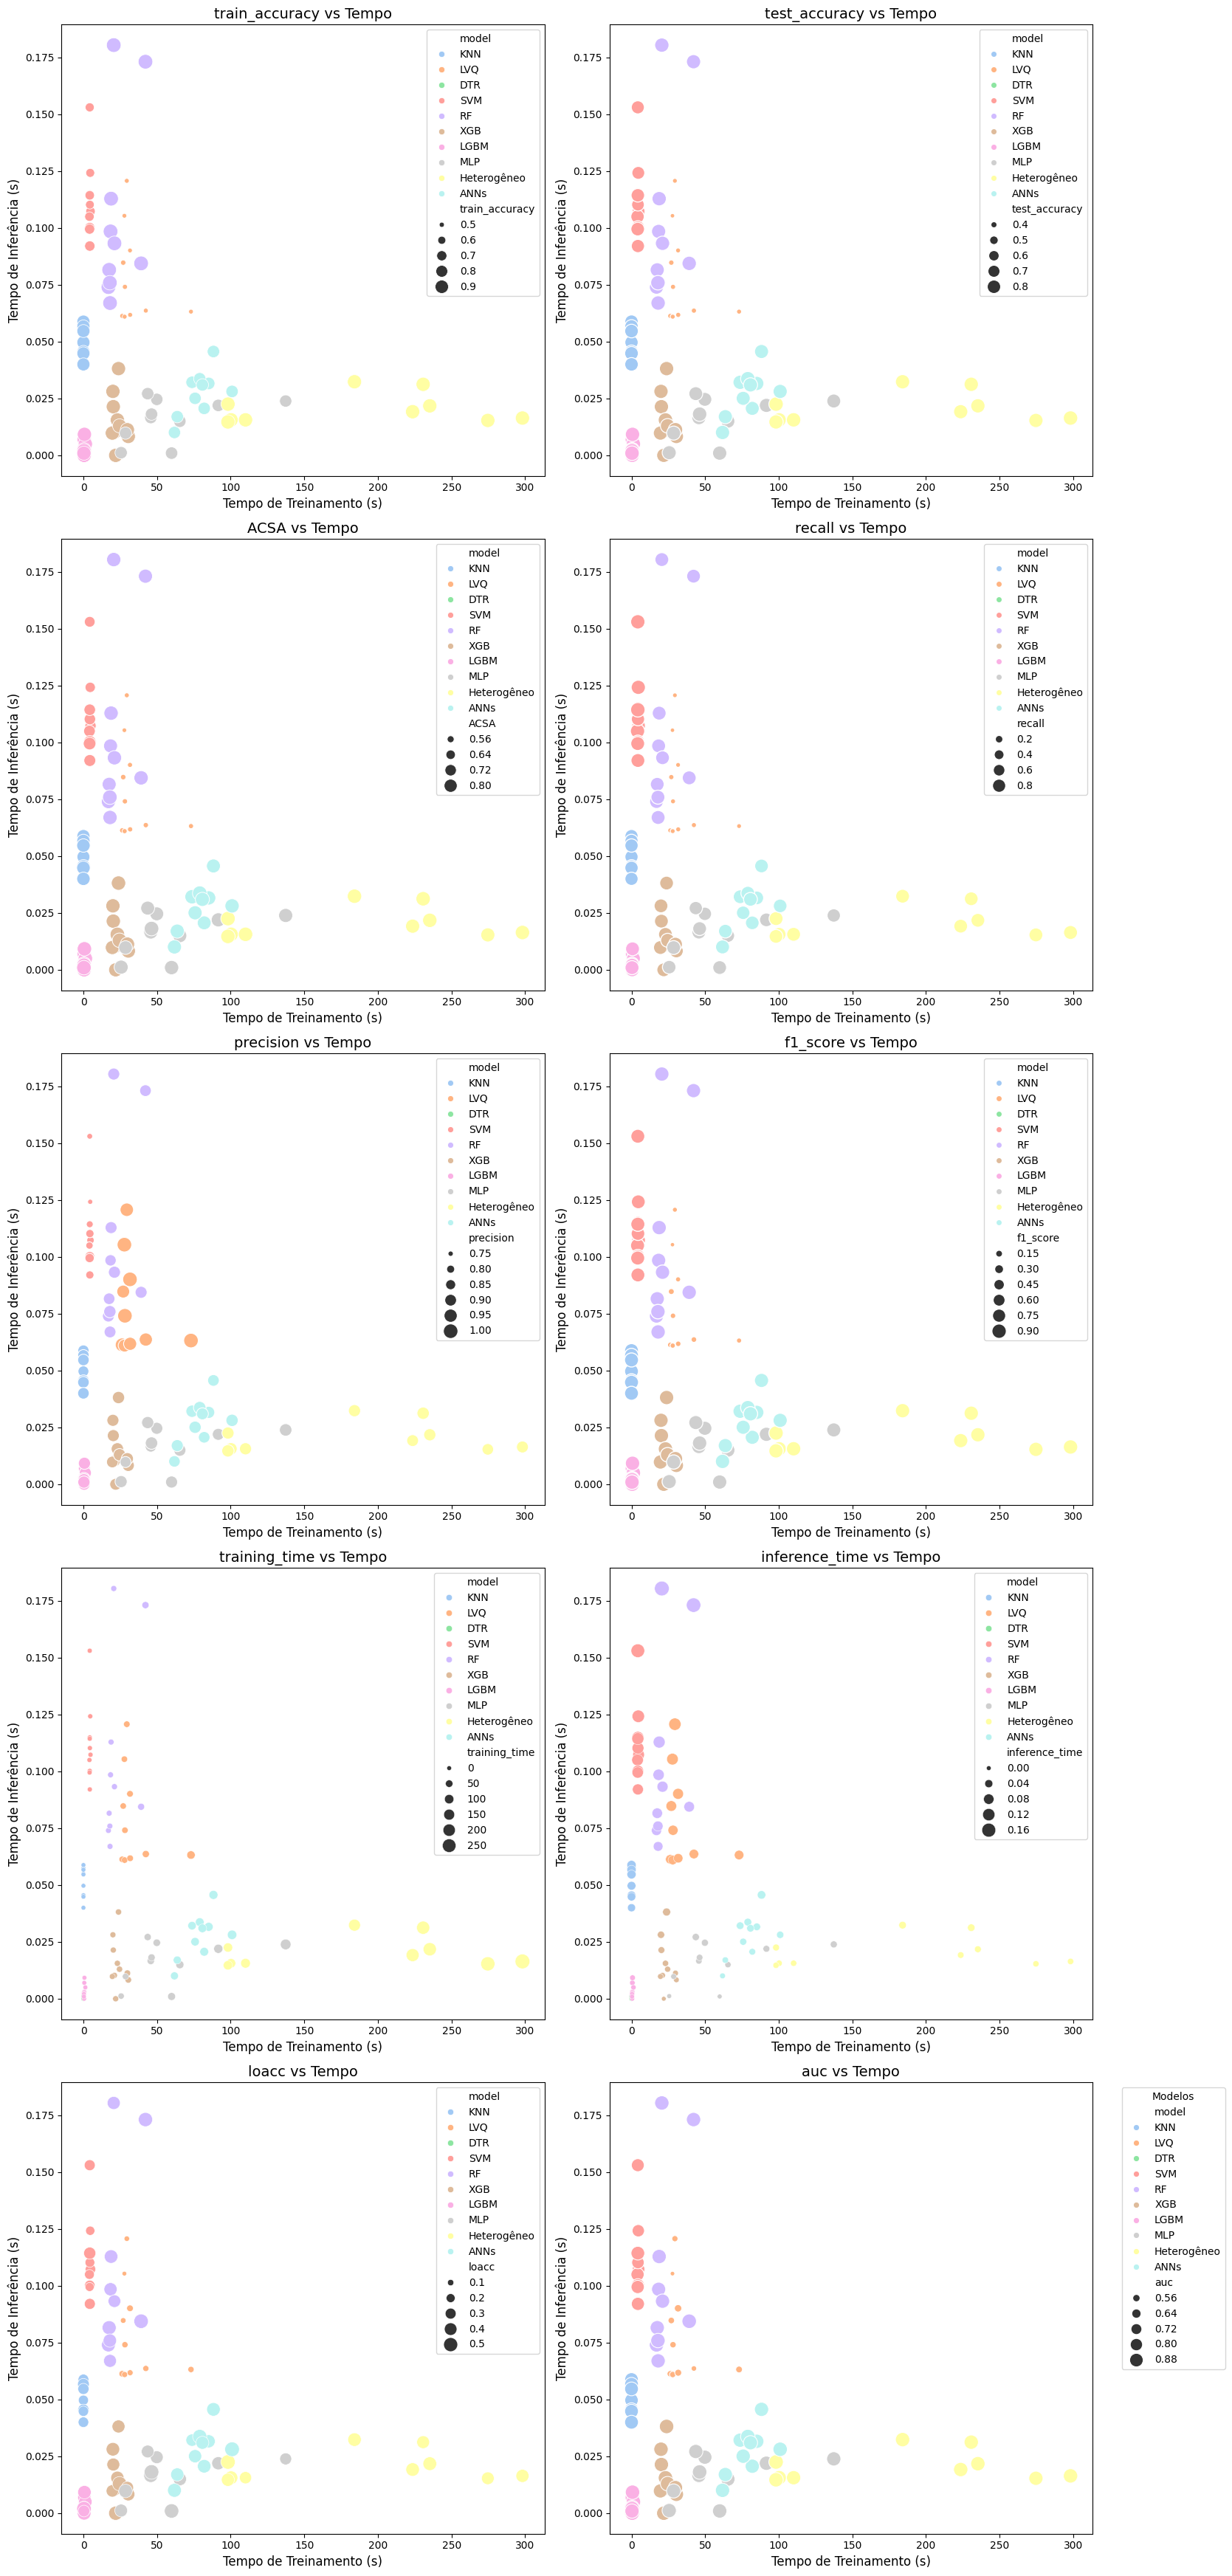

In [15]:
plot_time_vs_performance_scatter(
    list_of_model_results=list_of_model_results,
    list_of_model_names=list_of_model_names,
    list_of_metrics_names = list_of_metrics_names

)